In [1]:
using Revise
using QuantumDynamics
using Plots, LaTeXStrings

In [2]:
ρ0 = [1.0+0.0im 0.0; 0.0 0.0]
dt = 0.125
ntimes = 200

200

# Hermitian System

In [3]:
H = Utilities.create_tls_hamiltonian(; ϵ=0.0, Δ=2.0)

2×2 Matrix{ComplexF64}:
  0.0+0.0im  -1.0+0.0im
 -1.0+0.0im  -0.0+0.0im

In [4]:
times, ρs = Bare.propagate(; Hamiltonian=H, ρ0, dt, ntimes);

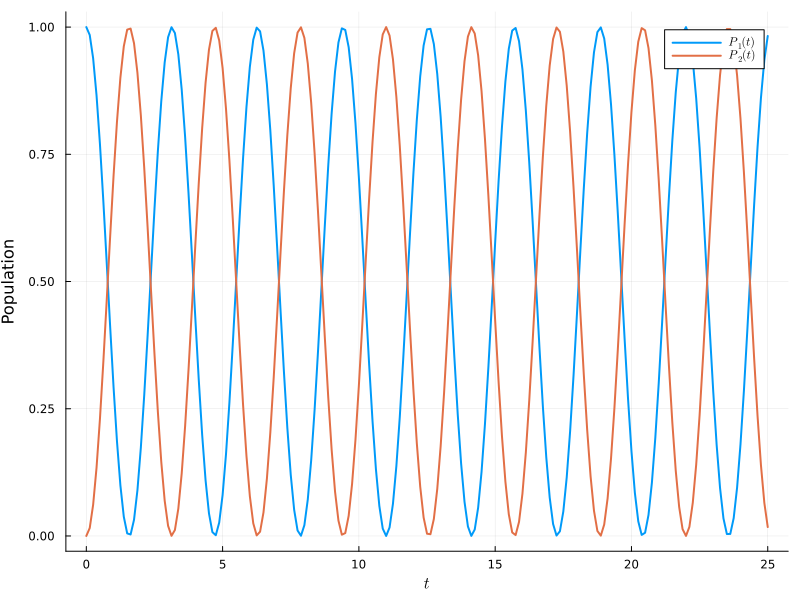

In [5]:
plot(times, real(ρs[:,1,1]), label=L"P_1(t)", lw = 2, size=(800, 600))
plot!(times, real(ρs[:,2,2]), label=L"P_2(t)", lw = 2)
xlabel!(L"t")
ylabel!("Population")

# Linblad Master Equations

In [6]:
times, ρs = Bare.propagate(; Hamiltonian=H, ρ0, dt, ntimes, L=[[0.0+0.0im 0.0; 0.75 0.0]]);

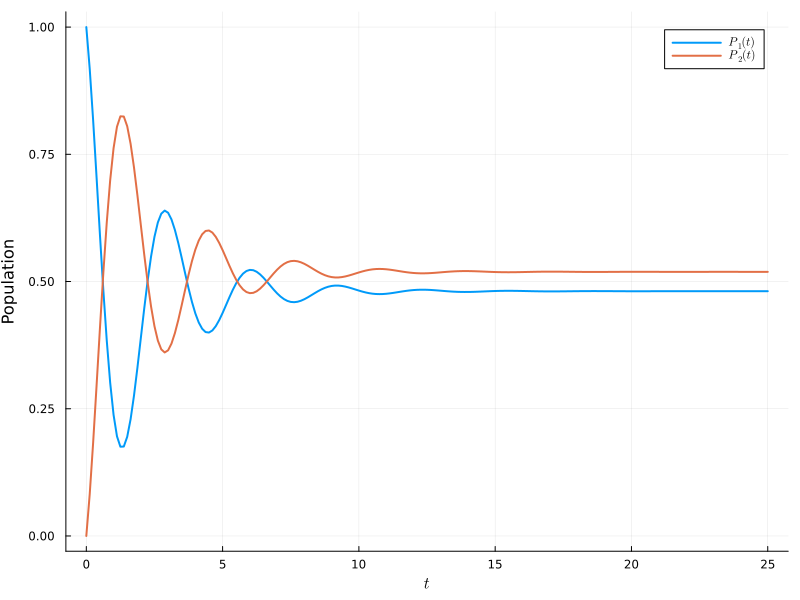

In [7]:
plot(times, real(ρs[:,1,1]), label=L"P_1(t)", lw = 2, size=(800, 600))
plot!(times, real(ρs[:,2,2]), label=L"P_2(t)", lw = 2)
xlabel!(L"t")
ylabel!("Population")

# Non-Hermitian Hamiltonian
## PT-Symmetric

In [8]:
H = Utilities.create_tls_hamiltonian(; ϵ=2.0im, Δ=2.0)

2×2 Matrix{ComplexF64}:
  0.0+1.0im  -1.0+0.0im
 -1.0+0.0im  -0.0-1.0im

In [9]:
times, ρs = Bare.propagate(; Hamiltonian=H, ρ0, dt, ntimes);

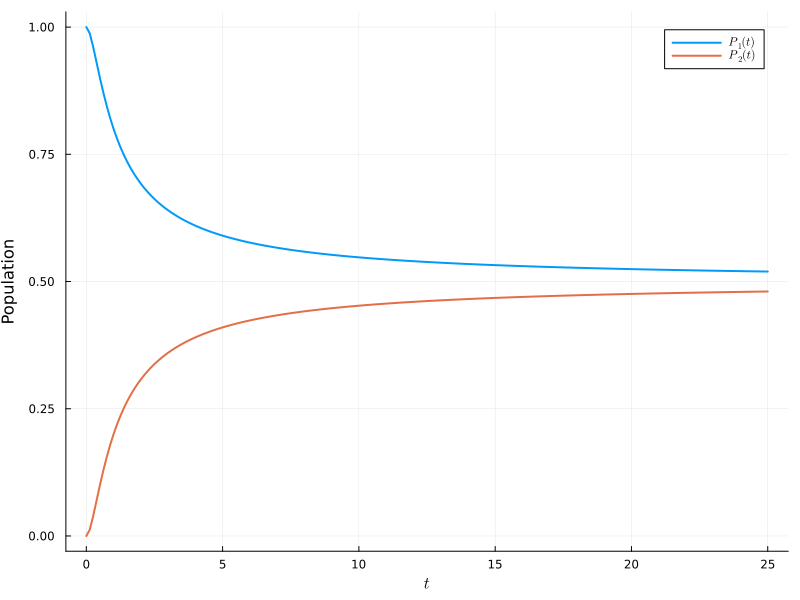

In [10]:
plot(times, real(ρs[:,1,1]), label=L"P_1(t)", lw = 2, size=(800, 600))
plot!(times, real(ρs[:,2,2]), label=L"P_2(t)", lw = 2)
xlabel!(L"t")
ylabel!("Population")

## non-PT-Symmetric

In [11]:
H = [exp(-1.5im) -0.75; -0.75 exp(0.75im)]
datum = (H[1,1]+H[2,2])/2
H[1,1] -= datum
H[2,2] -= datum
H

2×2 Matrix{ComplexF64}:
 -0.330476-0.839567im     -0.75+0.0im
     -0.75+0.0im       0.330476+0.839567im

In [12]:
times, ρs = Bare.propagate(; Hamiltonian=H, ρ0, dt, ntimes);

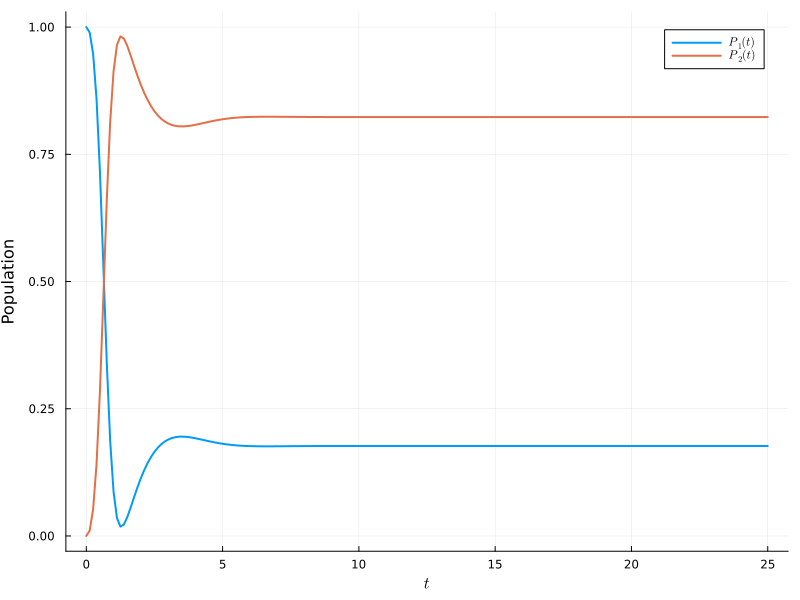

In [13]:
plot(times, real(ρs[:,1,1]), label=L"P_1(t)", lw = 2, size=(800, 600))
plot!(times, real(ρs[:,2,2]), label=L"P_2(t)", lw = 2)
xlabel!(L"t")
ylabel!("Population")